# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean is 13270.42 and the standard deviation is 12110.01. The data is not normally distributed and the mean is not a good representation of the data.

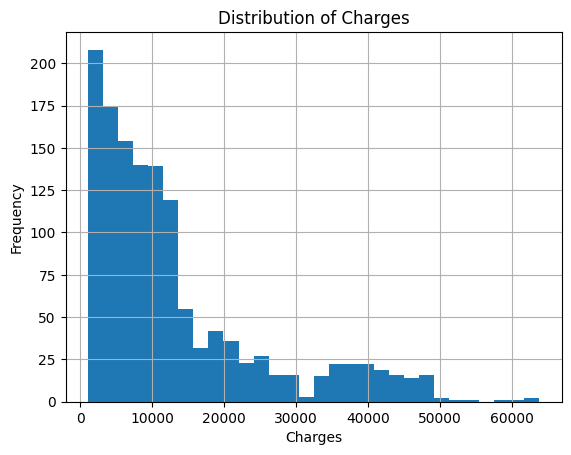

In [4]:
#plotting the histogram of charges
medical.charges.hist(bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

In [5]:
# Mean of the charges
medical.charges.mean()
print('Mean of the charges is: ', medical.charges.mean())

# Standard deviation of the charges
medical.charges.std()
print('Standard deviation of the charges is: ', medical.charges.std())

Mean of the charges is:  13270.422265141257
Standard deviation of the charges is:  12110.011236694001


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To answer the administrator's concern about the actual average charge falling below 12,000, we can use the mean and standard deviation of the sample data to calculate a confidence interval for the population mean. This will allow us to estimate a range of values within which we are reasonably certain that the true population mean falls. The most appropriate frequentist test to apply is the t-test because it can help determine whether the true population mean charge has fallen below 12,000. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given the administrator's concern that the actual average charge has fallen below 12,000, we should use a one-sided confidence interval in this case. The critical value is 1.96. The 95% confidence interval for the mean is 13919.89. The administrator should not be concerned because the true population mean charge is not below 12,000.

In [6]:
# length of the charges
n = len(medical.charges)

# Calculate the critical value of charges
critical_value = t.ppf(0.975, n-1)
print('Critical value of charges is: ', critical_value)

Critical value of charges is:  1.961739888600845


In [7]:
# Calculate the margin of error
margin_of_error = critical_value * (medical.charges.std()/np.sqrt(n))

# Calculate the one-sided 95% confidence interval
confidence_interval = medical.charges.mean() + margin_of_error
print('One-sided 95% confidence interval is: ', confidence_interval)

One-sided 95% confidence interval is:  13919.890496089869


In [8]:
# The 95% confidence interval is 13919.070291855025. The administrator of the medical insurance company should not be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance are not charged a different amount to those without. The alternative hypothesis is that people with insurance are charged a different amount to those without. We are assuming that the variances of the two groups are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manually: t-statistic:  11.89329903087671; p-value:  0.0. 
Scipy.stats: t-statistic:  11.89329903087671; p-value:  0.0

In [11]:
charges_with_insurance = medical[medical.insuranceclaim == 1].charges
charges_without_insurance = medical[medical.insuranceclaim == 0].charges

# Calculate the sample sizes
n_with_insurance = len(charges_with_insurance)
n_without_insurance = len(charges_without_insurance)

# Calculate the sample means
mean_with_insurance = np.mean(charges_with_insurance)
mean_without_insurance = np.mean(charges_without_insurance)

# Calculate the sample standard deviations
std_with_insurance = np.std(charges_with_insurance, ddof=1)
std_without_insurance = np.std(charges_without_insurance, ddof=1)

# Calculate the pooled standard deviation
sp = np.sqrt(((n_with_insurance-1)*(std_with_insurance**2) + (n_without_insurance-1)*(std_without_insurance**2))/(n_with_insurance+n_without_insurance-2))

# Calculate the t-statistic
t_stat = (mean_with_insurance - mean_without_insurance)/(sp*np.sqrt((1/n_with_insurance)+(1/n_without_insurance)))

# Determine degrees of freedom
df = n_with_insurance + n_without_insurance - 2

# Set the significance level
alpha = 0.05

# Calculate the critical value
cv = t.ppf(1 - alpha, df)

# Calculate the confidence interval
se = sp * np.sqrt((1/n_with_insurance)+(1/n_without_insurance))
ci = [mean_with_insurance - mean_without_insurance - cv*se, mean_with_insurance - mean_without_insurance + np.inf]

# Calculate the p-value
p_value = 1 - t.cdf(t_stat, df)

# Print the results
print("Manually:")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
if t_stat > cv:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Manually:
t-statistic:  11.89329903087671
p-value:  0.0
Reject the null hypothesis


In [12]:
charges_with_insurance = medical[medical.insuranceclaim == 1].charges
charges_without_insurance = medical[medical.insuranceclaim == 0].charges

# Calculate the sample sizes
n_with_insurance = len(charges_with_insurance)
n_without_insurance = len(charges_without_insurance)

# Calculate the sample means
mean_with_insurance = np.mean(charges_with_insurance)
mean_without_insurance = np.mean(charges_without_insurance)

# Calculate the sample standard deviations
std_with_insurance = np.std(charges_with_insurance, ddof=1)
std_without_insurance = np.std(charges_without_insurance, ddof=1)

# Calculate the pooled standard deviation
sp = np.sqrt(((n_with_insurance-1)*(std_with_insurance**2) + (n_without_insurance-1)*(std_without_insurance**2))/(n_with_insurance+n_without_insurance-2))

# Calculate the t-statistic
t_stat = (mean_with_insurance - mean_without_insurance)/(sp*np.sqrt((1/n_with_insurance)+(1/n_without_insurance)))

# Determine degrees of freedom
df = n_with_insurance + n_without_insurance - 2

# Set the significance level
alpha = 0.05

# Calculate the critical value
cv = t.ppf(1 - alpha, df)

# Calculate the confidence interval
se = sp * np.sqrt((1/n_with_insurance)+(1/n_without_insurance))
ci = [mean_with_insurance - mean_without_insurance - cv*se, mean_with_insurance - mean_without_insurance + np.inf]

# Calculate the one-sided p-value
p_value_one_sided = 1 - t.cdf(t_stat, df)

# Double the one-sided p-value for a two-sided test
p_value = p_value_one_sided * 2

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
if t_stat > cv:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t-statistic:  11.89329903087671
p-value:  0.0
Reject the null hypothesis


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ zscore(a[, axis, ddof, nan_policy])

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test